***Details of the columns in "excercise.csv"***

1. **User_ID**: A unique identifier for each user.  
2. **Gender**: The gender of the user (male or female).  
3. **Age**: The age of the user in years.  
4. **Height**: The height of the user in centimeters.  
5. **Weight**: The weight of the user in kilograms.  
6. **Duration**: The duration of the workout in minutes.  
7. **Heart_Rate**: The heart rate of the user during the workout in beats per minute (BPM).  
8. **Body_Temp**: The body temperature of the user during the workout in degrees Celsius.

***Details of the columns in "calories.csv"***

1. **User_ID**: A unique identifier for each user.
2. **Calories**: The number of calories burned by the user during a workout.


In [1]:
# importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading excercise.csv
excercise = pd.read_csv(r'/content/exercise.csv')
print(excercise.head())
calories = pd.read_csv(r"/content/calories.csv")
print(calories.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0


* First file contains all the important features.
* Second file contains the target variable
* We will be joining these two files for our better understanding.

In [3]:
df = excercise
df['Calories'] = calories['Calories']
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Now we have our feature and target columns in df.

In [4]:
df.shape

(15000, 9)

We have 15000 records with 9 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


EDA

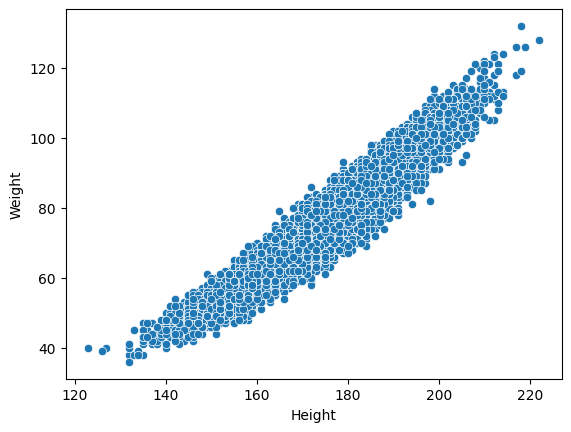

In [7]:
sns.scatterplot(x='Height', y='Weight', data=df)
plt.show()

We have a hint of linear relationship between Height and Weight.

---

Now we will see the relationship between calories and other feature and try to gauge how it they are connected.

In [8]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

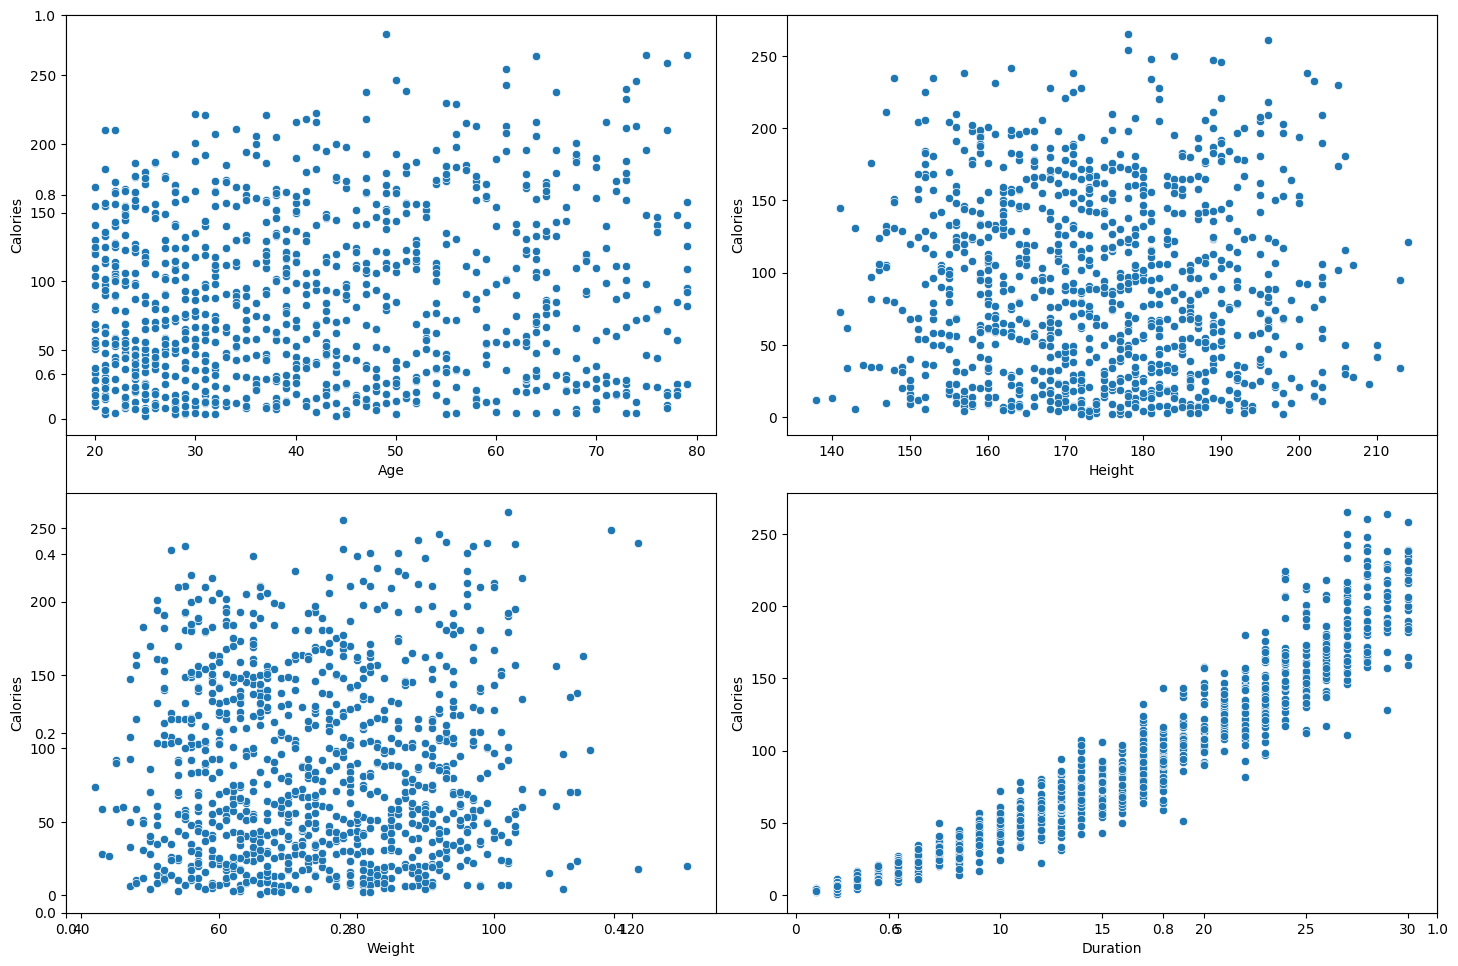

In [9]:
features = ['Age', 'Height', 'Weight', 'Duration']
plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
  plt.subplot(2, 2, i+1)
  x = df.sample(1000)                 #just gonna  look for 1000 samples because the dataset is quite huge
  sns.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()

* The only thing we can observe here is that as the duration increases the calories burned also increases.
* Which is quite obvious the more you workout the more your calories are burned.
* There might be a bit of difference though, for example the average height and weight of men is more than women so for the same duration men working out may burn a bit more calories than women.

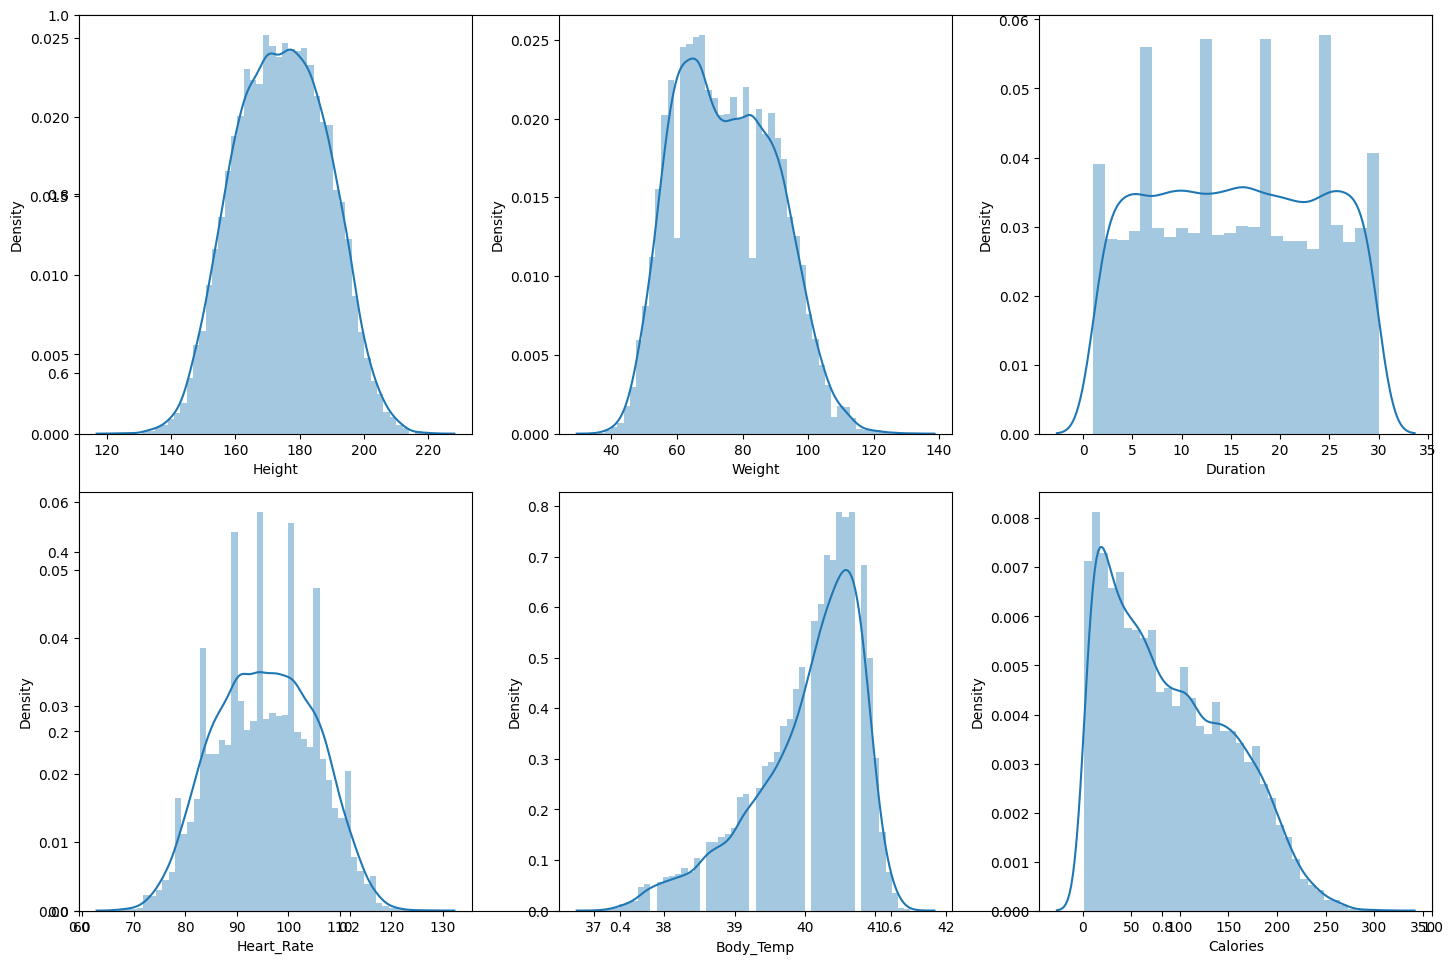

In [10]:
features = df.select_dtypes(include = "float").columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
  plt.subplot(2, 3, i+1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

In [11]:
df.Gender.unique()

array(['male', 'female'], dtype=object)

In [12]:
# Converting Gender column into numerical column
d = {'male':0, 'female':1}
df['Gender'] = df['Gender'].map(d)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


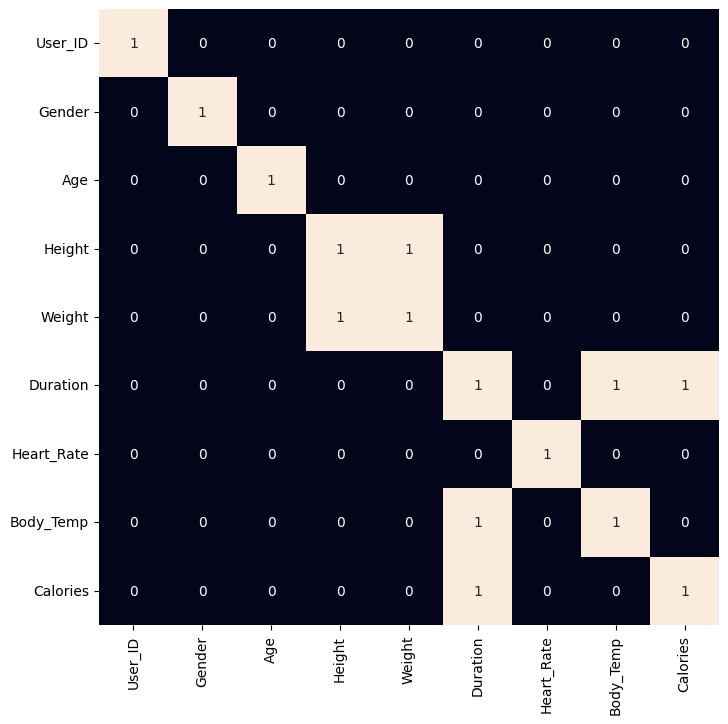

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr()>0.9, annot=True, cbar=False)
plt.show()

Here we have higher correlation for few columns so we will be removing them.
Columns to be removed are Weight and Duration.

In [14]:
df.drop(columns = ['Weight','Duration'], axis=1, inplace=True)
df.head()

,User_ID,Gender,Age,Height,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,105.0,40.8,231.0
1,14861698,1,20,166.0,94.0,40.3,66.0
2,11179863,0,69,179.0,88.0,38.7,26.0
3,16180408,1,34,179.0,100.0,40.5,71.0
4,17771927,1,27,154.0,81.0,39.8,35.0


Model Building.

In [15]:
# feature extraction and splitting the data
from sklearn.model_selection import train_test_split

x = df.drop(['User_ID','Calories'], axis=1)
y = df['Calories']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13500, 5), (1500, 5), (13500,), (1500,))

In [16]:
# Normalizing the features for stable learning
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error as mae

models = [LinearRegression(), XGBRegressor(), Lasso(), RandomForestRegressor(), Ridge()]

for model in models:
    model.fit(x_train, y_train)

    print(f'{model.__class__.__name__}')

    print("Training error: ",mae(y_train, model.predict(x_train)))
    print("Testing error: ", mae(y_test, model.predict(x_test)))
    print()

LinearRegression
Training error:  17.877045531939167
Testing error:  18.266111579037016

XGBRegressor
Training error:  7.857065686794895
Testing error:  10.703961022178332

Lasso
Training error:  17.900126786114622
Testing error:  18.270147514262693

RandomForestRegressor
Training error:  3.961191229276896
Testing error:  11.045789325396827

Ridge
Training error:  17.877124017493017
Testing error:  18.266195044424254



Out of all the models XGB Regressor and Random Forest Regressor are performing better than other models. Therefore we have a good mdel.

Thank you for going through my work till the end, feel free to get in touch if you have any doubts... :)